In [1]:
# Dependencies and Setup
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
shopping_trends_path=("shopping_trends_updated.csv")

In [3]:
shopping_trends_df = pd.read_csv(shopping_trends_path)

In [4]:
shopping_trends_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
shopping_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
shopping_trends_df["Purchase Amount (USD)"].head()

0    53
1    64
2    73
3    90
4    49
Name: Purchase Amount (USD), dtype: int64

In [7]:
shopping_trends_df["Review Rating"].head()

0    3.1
1    3.1
2    3.1
3    3.5
4    2.7
Name: Review Rating, dtype: float64

In [8]:
average_age=shopping_trends_df["Age"].mean()
average_age

44.06846153846154

In [9]:
# shopping_trends_df.groupby("Review Rating")["Age"]
df2= shopping_trends_df.groupby(['Purchase Amount (USD)','Age']).size().reset_index(name='Count')
df2

,Purchase Amount (USD),Age,Count
0,20,20,2
1,20,21,1
2,20,22,1
3,20,23,1
4,20,24,1
...,...,...,...
2587,100,59,1
2588,100,62,1
2589,100,67,2
2590,100,68,1


In [10]:
# shopping_trends_df.groupby("Review Rating")["Age"]
df3= shopping_trends_df.groupby(['Review Rating', 'Age']).size().reset_index(name='Count')
df3

,Review Rating,Age,Count
0,2.5,18,1
1,2.5,19,2
2,2.5,20,1
3,2.5,21,3
4,2.5,22,1
...,...,...,...
1285,5.0,63,2
1286,5.0,65,2
1287,5.0,68,2
1288,5.0,69,4


In [11]:
average_purchase_amount_by_age = shopping_trends_df.groupby("Age")["Purchase Amount (USD)"].mean().reset_index()
average_purchase_amount_by_age 

,Age,Purchase Amount (USD)
0,18,59.985507
1,19,61.000000
2,20,55.225806
3,21,64.101449
4,22,60.772727
5,23,56.746479
6,24,63.102941
7,25,63.200000
8,26,61.043478
9,27,53.734940


In [12]:
# Merge the average purchase amount back into the original DataFrame
shopping_trends_df = pd.merge(shopping_trends_df, average_purchase_amount_by_age, on="Age", how="left", suffixes=('', '_avg'))
shopping_trends_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Purchase Amount (USD)_avg
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,59.369863
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,61.000000
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,59.397590
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,64.101449
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,56.736111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,55.916667
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,58.287671
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,56.815789
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,64.941176


In [13]:
def plot_linear_regression(df, x_column, y_column):
    # Extract x and y values
    x_values = df[x_column]
    y_values = df[y_column]
    # Run regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    # Create the equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    # Plot values
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "-r")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Linear Regression: {x_column} vs. {y_column}")
    plt.show()
    print(f"The r-squared is: {rvalue**2}")

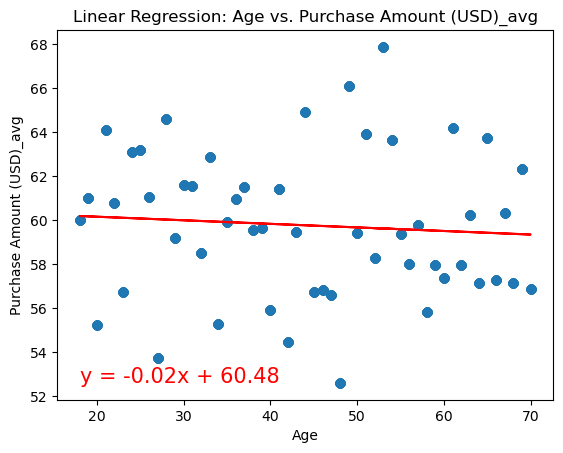

The r-squared is: 0.005704517317591763


In [14]:
# Plot the linear regression
plot_linear_regression(shopping_trends_df, "Age", "Purchase Amount (USD)_avg")

In [15]:
average_review_rating_by_age = shopping_trends_df.groupby("Age")["Review Rating"].mean().reset_index()
average_review_rating_by_age

,Age,Review Rating
0,18,3.744928
1,19,3.820988
2,20,3.841935
3,21,3.815942
4,22,3.730303
5,23,3.914085
6,24,3.744118
7,25,3.894118
8,26,3.788406
9,27,3.759036


In [16]:
# Merge the average review rating back into the original DataFrame
shopping_trends_df = pd.merge(shopping_trends_df, average_review_rating_by_age, on="Age", how="left", suffixes=('', '_avg'))
shopping_trends_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Purchase Amount (USD)_avg,Review Rating_avg
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,59.369863,3.663014
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,61.000000,3.820988
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,59.397590,3.825301
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,64.101449,3.815942
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,56.736111,3.626389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,55.916667,3.709722
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,58.287671,3.621918
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,56.815789,3.636842
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,64.941176,3.782353


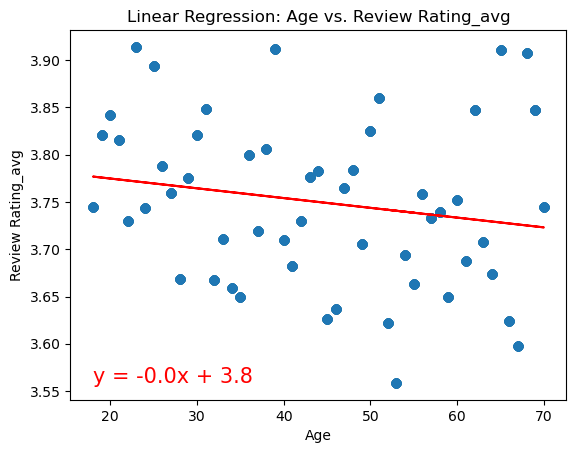

The r-squared is: 0.033032193235481504


In [17]:
plot_linear_regression(shopping_trends_df,"Age","Review Rating_avg")

In [18]:
average_purchase_amount_by_age.mean()

Age                      44.00000
Purchase Amount (USD)    59.76983
dtype: float64

In [19]:
average_purchase_amount_by_age.median()

Age                      44.000000
Purchase Amount (USD)    59.661765
dtype: float64

In [20]:
average_review_rating_by_age.mean()

Age              44.000000
Review Rating     3.748948
dtype: float64

In [21]:
average_review_rating_by_age.median()

Age              44.000000
Review Rating     3.744776
dtype: float64

In [37]:
average_purchase_amount_by_age.describe()

,Age,Purchase Amount (USD)
count,53.000000,53.000000
mean,44.000000,59.769830
std,15.443445,3.318734
min,18.000000,52.588235
25%,31.000000,57.160000
50%,44.000000,59.661765
75%,57.000000,61.605634
max,70.000000,67.885714


In [38]:
average_review_rating_by_age.describe()

,Age,Review Rating
count,53.000000,53.000000
mean,44.000000,3.748948
std,15.443445,0.087802
min,18.000000,3.558571
25%,31.000000,3.682558
50%,44.000000,3.744776
75%,57.000000,3.815942
max,70.000000,3.914085


In [25]:
shopping_trends_df.groupby("Age",as_index=False)["Purchase Amount (USD)_avg"].median().corr()

,Age,Purchase Amount (USD)_avg
Age,1.000000,-0.074649
Purchase Amount (USD)_avg,-0.074649,1.000000


In [26]:
shopping_trends_df.groupby("Age",as_index=False)["Purchase Amount (USD)_avg"].median().corr()

,Age,Purchase Amount (USD)_avg
Age,1.000000,-0.074649
Purchase Amount (USD)_avg,-0.074649,1.000000


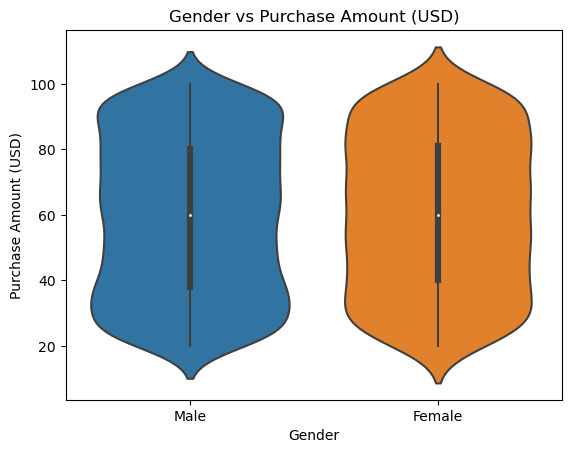

In [27]:
sns.violinplot(data=shopping_trends_df,x="Gender",y="Purchase Amount (USD)")
plt.title("Gender vs Purchase Amount (USD)")
plt.show()

In [28]:
shopping_trends_df.groupby("Gender").agg({"Purchase Amount (USD)":["mean","var"]})

Purchase Amount (USD)            
                        mean         var
Gender                                  
Female             60.249199  548.522453
Male               59.536199  566.914947

In [29]:
shopping_trends_df.groupby("Gender").agg({"Review Rating":["mean","var"]})

Review Rating          
                mean       var
Gender                        
Female      3.741426  0.519301
Male        3.753959  0.510143

In [30]:
males= shopping_trends_df.loc[shopping_trends_df.Gender == "Male", "Purchase Amount (USD)"]
print(males.mean())
print(males.var())

59.536199095022624
566.9149471470685


In [31]:
females= shopping_trends_df.loc[shopping_trends_df.Gender == "Female", "Purchase Amount (USD)"]
print(females.mean())
print(females.var())

60.249198717948715
548.5224532467663


In [32]:
stats.ttest_ind(males, females, equal_var=True)

TtestResult(statistic=-0.8769152065030424, pvalue=0.38058673555268097, df=3898.0)

In [33]:
males= shopping_trends_df.loc[shopping_trends_df.Gender == "Male", "Review Rating"]
print(males.mean())
print(males.var())

3.7539592760180995
0.5101427490010627


In [34]:
females= shopping_trends_df.loc[shopping_trends_df.Gender == "Female", "Review Rating"]
print(females.mean())
print(females.var())

3.741426282051282
0.5193009312092606


In [35]:
stats.ttest_ind(males, females, equal_var=True)

TtestResult(statistic=0.5097147504896427, pvalue=0.6102801734916257, df=3898.0)

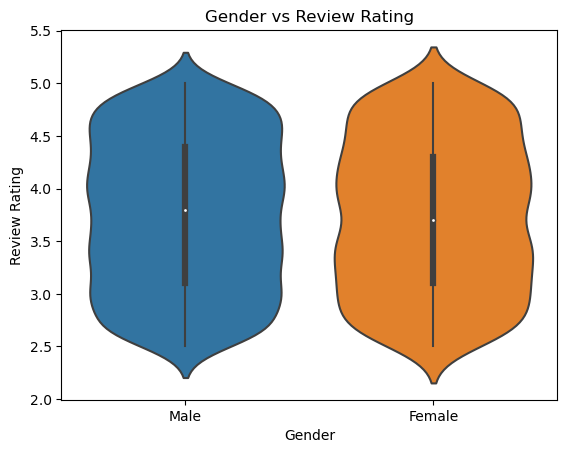

In [36]:
sns.violinplot(data=shopping_trends_df,x="Gender",y="Review Rating")
plt.title("Gender vs Review Rating")
plt.show()